# Real data validation

In [1]:
measured_path = ["../data/7_RI using kovats of Mass spectra from RAMClustR on data 71.msp"]
matched_path = ["../data/10_matchms output formatter _get-thresholded-data_ on data 76 and data 75.tsv"]
reference_lib = "../data/1_rcx_gc-orbitrap_metabolites_20210817.msp.msp"
concs = ["all"]


%load_ext autoreload
%autoreload 2

In [2]:
from matchms.importing import load_from_msp
from data_utils import spectrum_processing, get_n_samples
from helpers import get_mz_vector, get_his_size, compact_to_mz
from visual_utils import plot_spectrum_sample_prediction

import numpy as np
from matchms.filtering import normalize_intensities


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matchms.plotting import spectrum_plots

/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data loading

In [3]:
def get_spectra(path):
    # Load data from MSP file and apply filters
    spectrums = [*load_from_msp(path,  metadata_harmonization=False)]
    # Omit spectrums that didn't qualify for analysis
    spectrums = [normalize_intensities(s) for s in spectrums if s is not None]
    # Create spectrum documents
    return spectrums

# spectrums_val = get_spectra(data_val_path)
# spectrums_test = get_spectra(data_test_path)

In [4]:
measured, matched, enhanced = dict(), dict(), dict()
for i, conc in enumerate(concs):
    measured[conc] = {s.metadata["compound_name"]:s for s in get_spectra(f"{measured_path[i]}")}
    measured[conc+"_enh"] = {s.metadata["compound_name"]:s for s in get_spectra(f"{measured_path[i][:-4]}_enh.msp")}
    enhanced[conc] = {s.metadata["compound_name"]:s for s in get_spectra(f"{measured_path[i][:-4]}_enh.msp")}
    
    
    matched[conc] = pd.read_csv(f"{matched_path[i]}", sep="\t", names=["id", "name", "n_ions", 	"confidence"]).iloc[1:]
    matched[conc+"_enh"] = pd.read_csv(f"{matched_path[i]}", sep="\t", names=["id", "name", "n_ions", 	"confidence"])..iloc[1:]
    

In [5]:
library = {s.metadata["compound_name"]:s for s in get_spectra(reference_lib)}

In [6]:
library

{'Acetylserotonin_2TMS isomer 2': <matchms.Spectrum.Spectrum at 0x7f9d87b26828>,
 'Acetylserotonin_TMS derivative': <matchms.Spectrum.Spectrum at 0x7f9d87b26b38>,
 'Acetylserotonin_3TMS': <matchms.Spectrum.Spectrum at 0x7f9d87d87940>,
 'Acetylserotonin_2TMS isomer 1': <matchms.Spectrum.Spectrum at 0x7f9d87b2d278>,
 'Methylnicotinamide': <matchms.Spectrum.Spectrum at 0x7f9d87b2d400>,
 'Pipecolinic acid_2TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d470>,
 'Pipecolinic acid_1TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d518>,
 'Nicotinic acid_1TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d5f8>,
 'Ribose_4TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d6a0>,
 'Syringic acid_2TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d748>,
 'Guanine_3TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d7b8>,
 'Guanine_4TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d860>,
 'Leucine_2TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d940>,
 'Gallic acid_4TMS': <matchms.Spectrum.Spectrum at 0x7f9d87b2d9b0>,
 'tr

len(measured["32"])

In [7]:
measured["0"]["C001"]

KeyError: '0'

## Pair measured spectra with database spectra

In [8]:
from collections import defaultdict
paired = defaultdict(lambda x: defaultdict(dict))
for conc in concs:
    for s in measured[conc]:
        matched[conc]["id"] == s.metadata["compound_name"]
        paired[conc]["id"][] = 


SyntaxError: invalid syntax (<ipython-input-8-dcf4ef5451fa>, line 6)

In [9]:
def couple(meas_id, measured, library, matched, conc="0", repetition_count=0):
    mask = matched[conc]["id"] == meas_id
    if not (mask).any():
        return measured[conc][meas_id], None
    compound_name = matched[conc]["name"][mask].values[repetition_count]
    return measured[conc][meas_id], library[compound_name]

In [10]:
couple("C019", measured, library, matched, conc="0")

KeyError: '0'

In [11]:
conc = "all"

In [12]:

# for meas_id in measured[conc]:
#     spec, lib = couple(meas_id, measured, library, matched, conc=conc)
#     if lib is not None:
#         false_detected = set(spec.peaks.mz.astype(int)).difference(set(lib.peaks.mz.astype(int)))
#         missing_mz = set(lib.peaks.mz.astype(int)).difference(set(lib.peaks.mz.astype(int)).intersection(set(spec.peaks.mz.astype(int))))
#         plot_spectrum_sample_prediction(lib, missing_mz, [], false_detected, [])
        
        

## Experiment 1 - take the compounds and observe

In [13]:
def couple_plot(meas_id, measured, library, matched, conc="0", repetition_count=0):
    spec, lib = couple(meas_id, measured, library, matched, conc=conc, repetition_count=repetition_count)
    
    if lib is not None:
        false_detected = set(spec.peaks.mz.astype(int)).difference(set(lib.peaks.mz.astype(int)))
        missing_mz = set(lib.peaks.mz.astype(int)).difference(set(lib.peaks.mz.astype(int)).intersection(set(spec.peaks.mz.astype(int))))
        print(f"Spectrum {meas_id} - detected peaks: {len(spec.peaks.mz)}")
        print(f"When matched to {lib.metadata['compound_name']}: {matched[conc][matched[conc].id==meas_id].n_ions.values[repetition_count]} matched ions with {matched[conc][matched[conc].id==meas_id].confidence.values[repetition_count]} total confidence")
        print(f"In this match, {len(false_detected)} peaks were not in library spectrum and {len(missing_mz)} peaks from library spectrum were missing")
        plot_spectrum_sample_prediction(lib, missing_mz, [], false_detected, [])
        print()
    return spec, lib


Spectrum C02 - detected peaks: 54
When matched to Lysine_4TMS: 23 matched ions with 0.92281020332912 total confidence
In this match, 20 peaks were not in library spectrum and 25 peaks from library spectrum were missing


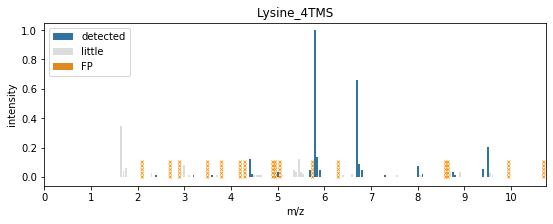

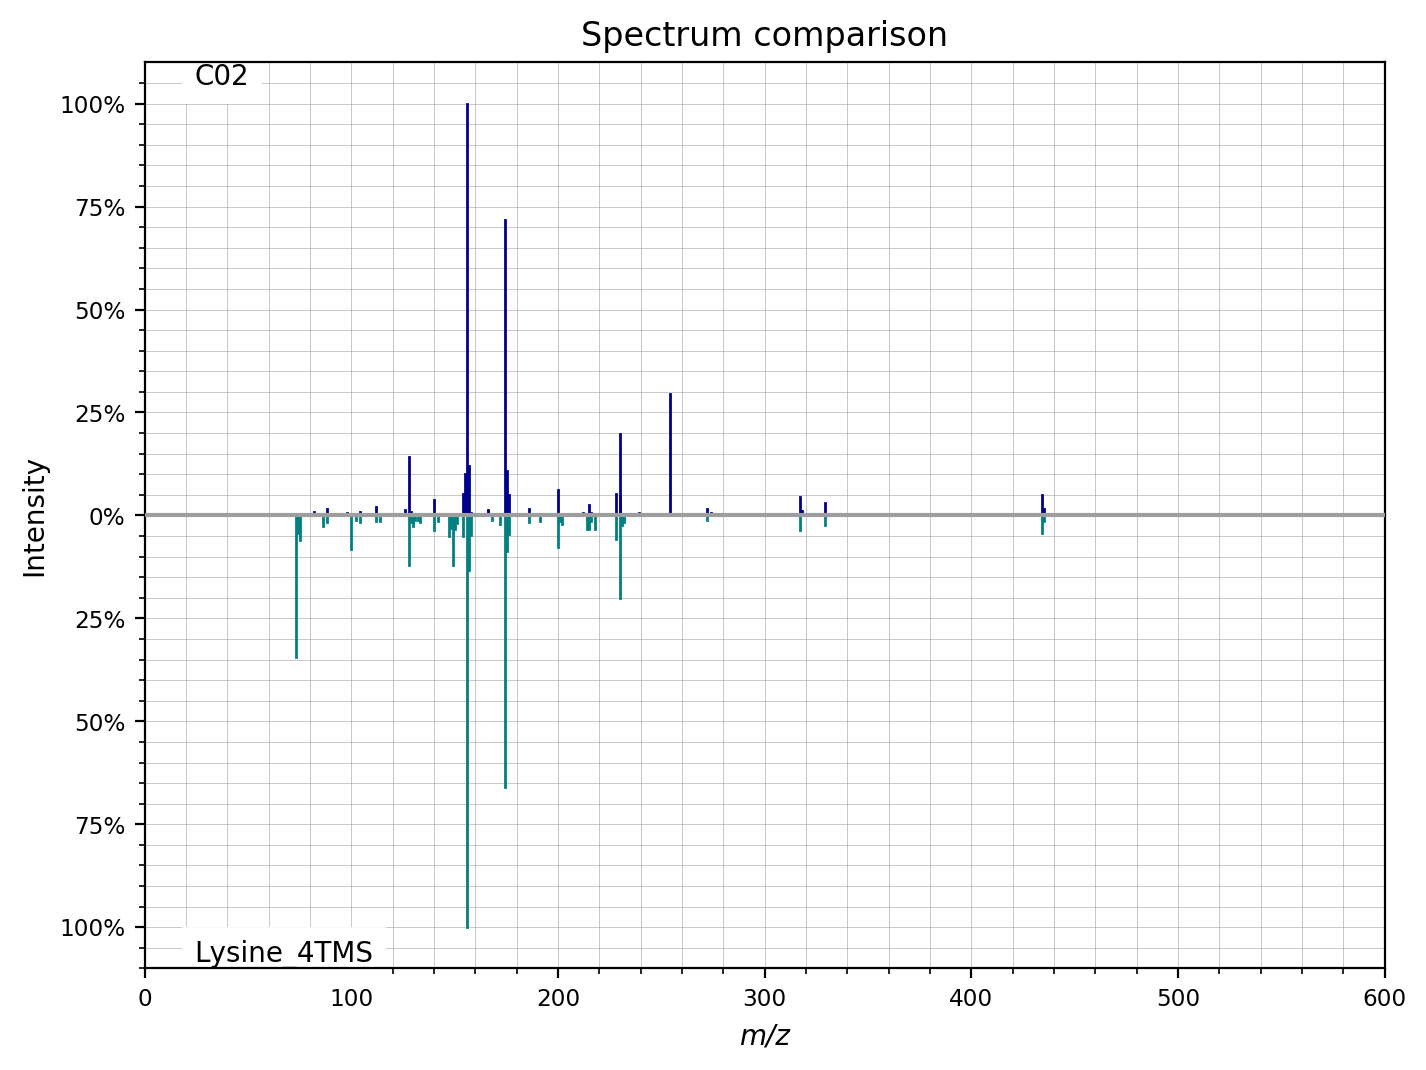

Spectrum C02 - detected peaks: 54
When matched to Pipecolinic acid_2TMS: 4 matched ions with 0.7553661382849925 total confidence
In this match, 40 peaks were not in library spectrum and 7 peaks from library spectrum were missing


KeyboardInterrupt: 

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f9cf4946f28>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/transforms.py", line 178, in <lambda>
    ref = weakref.ref(self, lambda ref, sid=id(self),
KeyboardInterrupt


Error in callback <function flush_figures at 0x7f9d6fa20950> (for post_execute):


KeyboardInterrupt: 

In [14]:
from collections import defaultdict

repetition_counter = defaultdict(lambda: 0)

for meas_id in matched[conc].id:
    spec, lib = couple_plot(meas_id, measured, library, matched, conc=conc, repetition_count=repetition_counter[meas_id])
    #plot_spectrum_sample_prediction(measured[conc][meas_id], [], [], [], [])
    spec.plot_against(lib, figsize=(8, 6))
    plt.show()
    
    repetition_counter[meas_id] += 1

## Observation
There is a clear trend of very few peaks detected. Also, however, this is a sample WITHOUT dilution. Although in over 50% of compounds, the most abundat peak is matched, the rest of the peaks is by no means behaving as we thought( few highmost detected). Rather, the peaks tend to be quite small.  

IMHO it is caused by many false matches (the 3 matching an 30% is prolly too relaxed setting), and the matched compounds does NOT correspond to the compounds in the measured sample. 

## Experiment 2 - take the compounds sorted by n mathed peaks  and observe

In [ ]:
def get_order(matched, conc=conc):
    repetition_counter = defaultdict(lambda: 0)
    order_dict = dict()
    for meas_id in matched[conc].id:
        order_dict[(meas_id, repetition_counter[meas_id])] = matched[conc].n_ions[matched[conc].id == meas_id].values[repetition_counter[meas_id]]    
        repetition_counter[meas_id] += 1
    return order_dict

ordered = get_order(matched, conc)
for c in reversed(sorted(ordered, key=lambda x: ordered[x])):
    spec, lib = couple_plot(c[0], measured, library, matched, conc=conc, repetition_count=c[1])
    #plot_spectrum_sample_prediction(measured[conc][c[0]], [], [], [], [])
    #fig, ax = plt.subplots(figsize=(12,8))
    spec.plot_against(lib, figsize=(8, 6))
    plt.show()

## Experiment 3 - take the compounds sorted by n mathed peaks, fill predicted and observe

In [ ]:
conc = "0"
def get_order(matched, conc=conc):
    repetition_counter = defaultdict(lambda: 0)
    order_dict = dict()
    for meas_id in matched[conc].id:
        order_dict[(meas_id, repetition_counter[meas_id])] = matched[conc].n_ions[matched[conc].id == meas_id].values[repetition_counter[meas_id]]    
        repetition_counter[meas_id] += 1
    return order_dict

ordered = get_order(matched, conc)
for c in reversed(sorted(ordered, key=lambda x: ordered[x])):
    spec, lib = couple_plot(c[0], measured, library, matched, conc=conc, repetition_count=c[1])
    spec.plot_against(lib, figsize=(8, 6))
    
    spec_enh,lib = couple_plot(c[0], measured, library, matched, conc=conc+"_enh", repetition_count=c[1])
    spec_enh.plot_against(lib, figsize=(8, 6))
    plt.show()

In [26]:
ref = pd.read_csv("../data/15_KC_Confirmed_seminalplasma.csv.csv")
ref

,Average Rt(min),Average RI,Metabolite name
0,2.484,1224.68,2-Methylmalonic acid_2TMS
1,5.333,2071.84,Acetylgalactosamine_4TMS
2,5.318,2065.37,Acetylgalactosamine_5TMS isomer 1
3,5.386,2088.77,Acetylgalactosamine_5TMS isomer 2
4,5.328,2070.17,Acetylglucosamine_5TMS isomer 1
...,...,...,...
60,2.993,1377.14,Threonine_3TMS spectra 1
61,2.996,1378.30,Threonine_3TMS spectra 2
62,4.218,1732.44,trans-Aconitic acid_3TMS
63,5.717,2208.86,Tryptophan_3TMS


In [18]:
matched["all"]

,id,name,n_ions,confidence
1,C02,Lysine_4TMS,23,0.92281020332912
2,C02,Pipecolinic acid_2TMS,4,0.7553661382849925
3,C06,Arabitol_5TMS,9,0.796552247937575
4,C06,Arabitol_5TMS,9,0.7972294938455029
5,C06,Arabitol_5TMS,10,0.796552247937575
6,C06,Arabitol_5TMS,10,0.7972294938455029
7,C06,Fructose_5TMS isomer 1,15,0.8584115640959713
8,C06,Fructose_5TMS isomer 2,18,0.8766808769415186
9,C06,Galactitol_6TMS,7,0.7806173392109105
10,C06,"Gluconic acid-1,4-lactone",7,0.8218563911271052


In [27]:
ground = set(ref["Metabolite name"])
pred = set(matched["all"].name) 

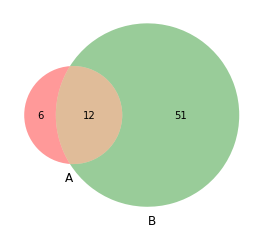

In [28]:
from matplotlib_venn import venn2
venn2((pred, ground))